In [5]:
'''
Pandas Homework with IMDb data
'''

'\nPandas Homework with IMDb data\n'

In [3]:
'''
BASIC LEVEL
'''

'\nBASIC LEVEL\n'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
imdb_1000_data_url = r'imdb_1000.csv'
movies = pd.read_csv(imdb_1000_data_url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [3]:
# check the number of rows and columns
movies.shape

(979, 6)

In [4]:
# check the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [30]:
# calculate the average movie duratio
movies['duration'].mean()
#movies.duration.mean().round(1) '''gives an error message. why?'''

120.97957099080695

In [31]:
# sort the DataFrame by duration to find the shortest and longest movi
sort_movies_duration=movies.sort_values(by='duration', ascending=False)
#print(sort_movies_duration.head(1))
#print(sort_movies_duration.tail(1))
#or 
print('longest movies is ', sort_movies_duration.title.head(1))
print('shortest movies is ',sort_movies_duration.title.tail(1))

longest movies is  476    Hamlet
Name: title, dtype: object
shortest movies is  389    Freaks
Name: title, dtype: object


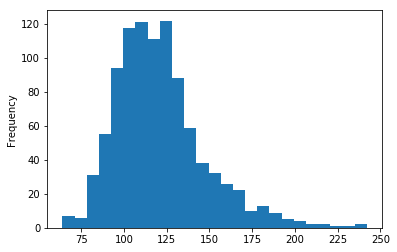

In [32]:
# create a histogram of duration, choosing an "appropriate" number of bins
movies.duration.plot.hist(bins=25)

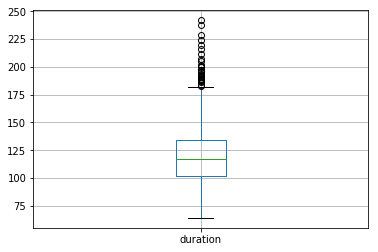

In [33]:
# use a box plot to display that same data
movies.boxplot(column='duration')

In [34]:
'''
INTERMEDIATE LEVEL
'''

'\nINTERMEDIATE LEVEL\n'

In [35]:
# count how many movies have each of the content ratings
movie_ratings=movies.groupby(by='content_rating').title.count()

Text(0,0.5,'number of movies')

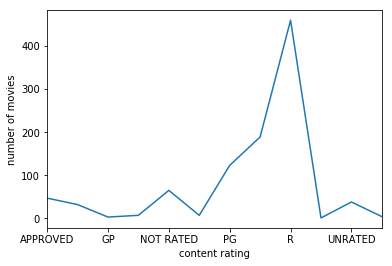

In [36]:
# use a visualization to display that same data, including a title and x and y labels
movie_plot=movie_ratings.plot()
movie_plot.set_xlabel('content rating')
movie_plot.set_ylabel('number of movies')

In [37]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies.replace(['NOT RATED','APPROVED','PASSED', 'GP'],'UNRATED', inplace=True)

In [38]:
# convert the following content ratings to "NC-17": X, TV-MA
movies.replace(['X', 'TV-MA'],'NC-17', inplace=True)

In [5]:
# count the number of missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [9]:
#show the rows with missing values in content_rating category
movies[movies.content_rating.isna()]


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [40]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies[movies.content_rating.isna()].title
movies.iloc[187,2] = 'R'
movies.iloc[649,2] = 'PG-13'
movies.iloc[936,2] = 'R'
print(movies.iloc[187,2])
print(movies.iloc[649,2])
print(movies.iloc[936,2])

R
PG-13
R


In [41]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
import numpy as np
long_movies=movies[movies.duration>119].star_rating.mean()
short_movies=movies[movies.duration<119].star_rating.mean()
print('average rating of a movies 2hrs or longer = ', np.round_(long_movies, decimals=2))
print('average rating of a movies shorter than 2 hrs = ', np.around(short_movies, decimals=2))

average rating of a movies 2hrs or longer =  7.95
average rating of a movies shorter than 2 hrs =  7.84


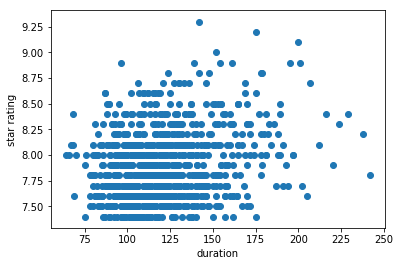

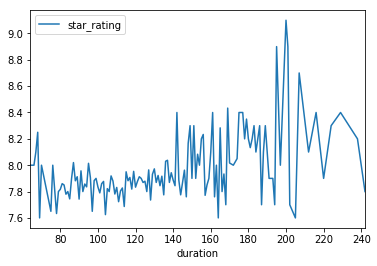

In [42]:
# use a visualization to detect whether there is a relationship between duration and star rating
plt.scatter(movies.duration, movies.star_rating)
plt.xlabel('duration')
plt.ylabel('star rating')
plt.show()
group_movies=movies.groupby('duration').mean()
group_movies.plot()

In [10]:
# groupby statement gives you an object that you then need to perfrom an operation on to create something readable

movies.groupby('genre')

In [43]:
# calculate the average duration for each genre
np.round_(movies.groupby('genre').duration.mean(), decimals=2)


genre
Action       126.49
Adventure    134.84
Animation     96.60
Biography    131.84
Comedy       107.60
Crime        122.30
Drama        126.54
Family       107.50
Fantasy      112.00
Film-Noir     97.33
History       66.00
Horror       102.52
Mystery      115.62
Sci-Fi       109.00
Thriller     114.20
Western      136.67
Name: duration, dtype: float64

In [44]:
'''
ADVANCED LEVEL
'''

'\nADVANCED LEVEL\n'

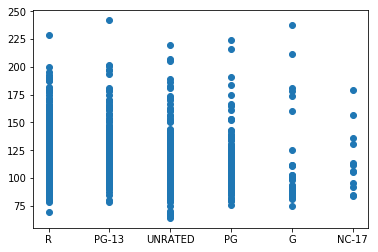

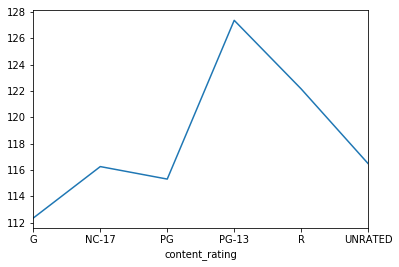

In [45]:
# visualize the relationship between content rating and duration
plt.scatter(movies['content_rating'],movies['duration'])
plt.show()
movies.groupby('content_rating').duration.mean().plot()
plt.show()

In [46]:
# determine the top rated movie (by star rating) for each genre
#movies.groupby(['genre']).star_rating.max() #what does it do?
movies.groupby('genre').title.first()


genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

In [47]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
movies[movies.title.duplicated()]


,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,R,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [48]:

movies[(movies.title.duplicated()) & (movies.actors_list.duplicated())]


,star_rating,title,content_rating,genre,duration,actors_list


In [20]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies
'''set up a filter that identifies generes with 9 or less movies '''
movies_filter=movies.genre.value_counts() > 9


print(movies_filter)

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Thriller     False
Sci-Fi       False
Film-Noir    False
Family       False
History      False
Fantasy      False
Name: genre, dtype: bool


In [50]:
# option 1: manually create a list of relevant genres, then filter using that list
movies_list=['Drama', 'Comedy', 'Action', 'Crime','Biography', 'Adventure', 'Animation', 'Horror']
 
rating_by_genre=[np.round(movies[movies.genre.isin([filtered_genre])].star_rating.mean(), decimals=2) for filtered_genre in movies_list ]
print(rating_by_genre)

[7.9, 7.82, 7.88, 7.92, 7.86, 7.93, 7.91, 7.81]


In [51]:
output_list=list(zip(movies_list, rating_by_genre))


In [52]:
print(output_list) 

[('Drama', 7.9), ('Comedy', 7.82), ('Action', 7.88), ('Crime', 7.92), ('Biography', 7.86), ('Adventure', 7.93), ('Animation', 7.91), ('Horror', 7.81)]


In [53]:
# option 1a create an index array
movie_index=movies_filter[movies_filter!=0].index
print(movie_index)

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery'],
      dtype='object')


In [24]:
movies_filter.index

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery', 'Western', 'Thriller', 'Sci-Fi',
       'Film-Noir', 'Family', 'History', 'Fantasy'],
      dtype='object')

In [21]:
# option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

'''create a list of movie genre'''
list_movie_genre=movies_filter.index

In [22]:
'''filter out the infrequent genres >=10'''
list_movie_genre[movies_filter]

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery'],
      dtype='object')

In [56]:
'''calculate average star_rating for each genre'''
#         iterate over the index series
[(entry , np.round_(movies[movies.genre.isin([entry])].star_rating.mean(), decimals=2)) for entry in movie_index] 


[('Drama', 7.9),
 ('Comedy', 7.82),
 ('Action', 7.88),
 ('Crime', 7.92),
 ('Biography', 7.86),
 ('Adventure', 7.93),
 ('Animation', 7.91),
 ('Horror', 7.81),
 ('Mystery', 7.98)]

In [57]:
# option 3: calculate the average star rating for all genres, then filter using a boolean Series



In [58]:
# option 4: aggregate by count and mean, then filter using the count
genre_list= movies.genre.unique()


In [59]:
list_movies_filtered=[]
filter_counts=[movies[(movies.genre==entry)].agg(['count','mean']) for entry in genre_list]


In [60]:
filter_counts
#this doesn't seem to be the right way


[       star_rating  title  content_rating  genre    duration  actors_list
 count   124.000000  124.0           124.0  124.0  124.000000        124.0
 mean      7.916935    NaN             NaN    NaN  122.298387          NaN,
        star_rating  title  content_rating  genre    duration  actors_list
 count   136.000000  136.0           136.0  136.0  136.000000        136.0
 mean      7.884559    NaN             NaN    NaN  126.485294          NaN,
        star_rating  title  content_rating  genre    duration  actors_list
 count   278.000000  278.0           278.0  278.0  278.000000        278.0
 mean      7.902518    NaN             NaN    NaN  126.539568          NaN,
        star_rating  title  content_rating  genre    duration  actors_list
 count     9.000000    9.0             9.0    9.0    9.000000          9.0
 mean      8.255556    NaN             NaN    NaN  136.666667          NaN,
        star_rating  title  content_rating  genre  duration  actors_list
 count    75.000000   7

In [61]:
'''
BONUS
'''

'\nBONUS\n'

In [108]:
# Figure out something "interesting" using the actors data!
# is there an actor who has appeared in every genre?

'''make a list of actor names'''

actors_names=str(movies.actors_list)
import re
names=re.compile('\w+\s\w+')
list_of_names=names.findall(actors_names)
print(list_of_names)

# double checked the count name by counting the number of commas

['Tim Robbins', 'Morgan Freeman', 'Bob Gunt', 'Marlon Brando', 'Al Pacino', 'James Caan', 'Al Pacino', 'Robert De', 'Robert Duv', 'Christian Bale', 'Heath Ledger', 'Aaron E', 'John Travolta', 'Uma Thurman', 'Samuel L', 'Dustin Hoffman', 'Jessica Lange', 'Teri G', 'Michael J', 'Christopher Lloyd', 'Russell Crowe', 'Paul Bettany', 'Billy Bo', 'JoBeth Williams', 'Heather O', 'Charlie Sheen', 'Michael Douglas']


In [109]:
names.findall(', '.join(movies.actors_list))


['Tim Robbins',
 'Morgan Freeman',
 'Bob Gunton',
 'Marlon Brando',
 'Al Pacino',
 'James Caan',
 'Al Pacino',
 'Robert De',
 'Robert Duvall',
 'Christian Bale',
 'Heath Ledger',
 'Aaron Eckhart',
 'John Travolta',
 'Uma Thurman',
 'Samuel L',
 'Henry Fonda',
 'Lee J',
 'Martin Balsam',
 'Clint Eastwood',
 'Eli Wallach',
 'Lee Van',
 'Elijah Wood',
 'Viggo Mortensen',
 'Ian McKellen',
 'Liam Neeson',
 'Ralph Fiennes',
 'Ben Kingsley',
 'Brad Pitt',
 'Edward Norton',
 'Helena Bonham',
 'Elijah Wood',
 'Ian McKellen',
 'Orlando Bloom',
 'Leonardo DiCaprio',
 'Joseph Gordon',
 'Ellen Page',
 'Mark Hamill',
 'Harrison Ford',
 'Carrie Fisher',
 'Tom Hanks',
 'Robin Wright',
 'Gary Sinise',
 'Elijah Wood',
 'Ian McKellen',
 'Viggo Mortensen',
 'Matthew McConaughey',
 'Anne Hathaway',
 'Jessica Chastain',
 'Jack Nicholson',
 'Louise Fletcher',
 'Michael Berryman',
 'xf4 Mifune',
 'Takashi Shimura',
 'Keiko Tsushima',
 'Robert De',
 'Ray Liotta',
 'Joe Pesci',
 'Mark Hamill',
 'Harrison Ford',

In [453]:
#groupby  itertools might be the answer/ask during office hours 

group_var=movies.groupby('genre')

# figure out how to itereate over the groupby using the actors list
'''from itertools import groupby
for list_of_names, b in groupby(movies, lambda x:x[0]):
        for c in b:
            print(c[1], list_of_names)'''

t s
i t
o c
e g
u d
c a


In [64]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [88]:
actors = sorted((', '.join(movies['actors_list'].str.replace('[', '').str.replace(']', '').str.replace("u'", '').str.replace("'", '')).split(', ')))

In [89]:
actors

['Aamir Khan',
 'Aamir Khan',
 'Aamir Khan',
 'Aamir Khan',
 'Aamir Khan',
 'Aaron Eckhart',
 'Aaron Eckhart',
 'Aaron Taylor-Johnson',
 'Abbie Cornish',
 'Abigail Breslin',
 'Ad\\xe8le Exarchopoulos',
 'Adam Bryant',
 'Adam Driver',
 'Adam Levine',
 'Adam Sandler',
 'Adel Bencherif',
 'Adil Hussain',
 'Adolphe Menjo',
 'Adriana Caselotti',
 'Adrien Brody',
 'Adrien Brody',
 'Agame Malembo-Emene',
 'Ahmad Khan Mahmoodzada',
 'Aidan Quinn',
 'Aitana S\\xe1nchez-Gij\\xf3n',
 'Akemi Yamaguchi',
 'Aki Maeda',
 'Akio \\xd4tsuka',
 'Akira Terao',
 'Aksel Hennie',
 'Akshaye Khanna',
 'Al Pacino',
 'Al Pacino',
 'Al Pacino',
 'Al Pacino',
 'Al Pacino',
 'Al Pacino',
 'Al Pacino',
 'Al Pacino',
 'Al Pacino',
 'Al Pacino',
 'Al Pacino',
 'Al Pacino',
 'Al Pacino',
 'Alain Delon',
 'Alan Ladd',
 'Alan Rickman',
 'Alan Rickman',
 'Alan Rickman',
 'Alan Ruck',
 'Alan Tudyk',
 'Albert Brooks',
 'Albert Finney',
 'Albert Finney',
 'Albert R\\xe9my',
 'Alec Baldwin',
 'Alec Baldwin',
 'Alec Baldwin',


In [90]:
from collections import Counter
actor_counts = Counter(actors)

In [91]:
actor_counts.most_common(10)

[('Robert De Niro', 18),
 ('Brad Pitt', 14),
 ('Clint Eastwood', 14),
 ('Tom Hanks', 14),
 ('Al Pacino', 13),
 ('Johnny Depp', 12),
 ('Christian Bale', 11),
 ('Dustin Hoffman', 11),
 ('Leonardo DiCaprio', 11),
 ('Denzel Washington', 10)]

In [92]:
actor_counts

Counter({'Aamir Khan': 5,
         'Aaron Eckhart': 2,
         'Aaron Taylor-Johnson': 1,
         'Abbie Cornish': 1,
         'Abigail Breslin': 1,
         'Ad\\xe8le Exarchopoulos': 1,
         'Adam Bryant': 1,
         'Adam Driver': 1,
         'Adam Levine': 1,
         'Adam Sandler': 1,
         'Adel Bencherif': 1,
         'Adil Hussain': 1,
         'Adolphe Menjo': 1,
         'Adriana Caselotti': 1,
         'Adrien Brody': 2,
         'Agame Malembo-Emene': 1,
         'Ahmad Khan Mahmoodzada': 1,
         'Aidan Quinn': 1,
         'Aitana S\\xe1nchez-Gij\\xf3n': 1,
         'Akemi Yamaguchi': 1,
         'Aki Maeda': 1,
         'Akio \\xd4tsuka': 1,
         'Akira Terao': 1,
         'Aksel Hennie': 1,
         'Akshaye Khanna': 1,
         'Al Pacino': 13,
         'Alain Delon': 1,
         'Alan Ladd': 1,
         'Alan Rickman': 3,
         'Alan Ruck': 1,
         'Alan Tudyk': 1,
         'Albert Brooks': 1,
         'Albert Finney': 2,
         'Albert R\\xe

In [95]:
df = pd.DataFrame(actor_counts.most_common(), columns=['Actor', 'MovieCount'])

In [96]:
df.head()

,Actor,MovieCount
0,Robert De Niro,18
1,Brad Pitt,14
2,Clint Eastwood,14
3,Tom Hanks,14
4,Al Pacino,13
